In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1021]:
train = pd.read_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV Mobile Analytics/train.csv")

In [481]:
train.shape

(131662, 14)

In [482]:
train.head(5)

Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
0  T0005689460           6.77           B                    1.0   
1  T0005689461          29.47           B                   10.0   
2  T0005689464          41.58         NaN                   10.0   
3  T0005689465          61.56           C                   10.0   
4  T0005689467          54.95           C                   10.0   

   Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
0           2.42769                           A                A   
1           2.78245                           B                A   
2               NaN                         NaN                E   
3               NaN                         NaN                A   
4           3.03453                           B                A   

   Customer_Rating  Cancellation_Last_1Month  Var1  Var2  Var3  Gender  \
0          3.90500                         0  40.0    46    60  Female   
1          3.45000                         0  38.0    56    78    Male   
2          3.50125                         2   NaN    56    77    Male   
3          3.45375                         0   NaN    52    74    Male   
4          3.40250                         4  51.0    49   102    Male   

   Surge_Pricing_Type  
0                   2  
1                   2  
2                   2  
3                   3  
4                   2

In [468]:
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [483]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [499]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [485]:
train.isnull().sum()*100/train.shape[0]

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [486]:
train[(train.Life_Style_Index.isnull() == True) & (train.Confidence_Life_Style_Index.isnull() == False)]

Empty DataFrame
Columns: [Trip_ID, Trip_Distance, Type_of_Cab, Customer_Since_Months, Life_Style_Index, Confidence_Life_Style_Index, Destination_Type, Customer_Rating, Cancellation_Last_1Month, Var1, Var2, Var3, Gender, Surge_Pricing_Type]
Index: []

In [ ]:
# More than 50% of Var1 is missing
# The two columns are correlated in missing values: Life_Style_Index and Confidence_Life_Style_Index

## Convert Destination Type column into integers 

In [980]:
train.Destination_Type = np.where(train.Destination_Type == 'A', 1, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'B', 2, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'C', 3, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'D', 4, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'E', 5, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'F', 6, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'G', 7, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'H', 8, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'I', 9, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'J', 10, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'K', 11, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'L', 12, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'M', 13, train.Destination_Type)
train.Destination_Type = np.where(train.Destination_Type == 'N', 14, train.Destination_Type)

## Convert Gender into integers

In [981]:
train.Gender = np.where(train.Gender == 'Male', 0, 1)

In [1022]:
train_Var1 = train['Var1']

In [1024]:
train_Var1.fillna(train['Var1'].mean(), inplace=True)

In [1025]:
train_Var1

0          40.000000
1          38.000000
2          64.202698
3          64.202698
4          51.000000
             ...    
131657     61.000000
131658     64.202698
131659     64.202698
131660     47.000000
131661    102.000000
Name: Var1, Length: 131662, dtype: float64

## Model-based strategy: Basic step
## Model-based strategy: Progressive step

### Drop Var1 column

In [982]:
train = train.drop(['Var1'], axis = 1)

### Create X and y for K nearest Neighbor selection

In [869]:
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

In [584]:
train.shape

(131662, 13)

In [983]:
train_cab_filled = train[train['Type_of_Cab'].isnull() == False]
train_cab_null = train[train['Type_of_Cab'].isnull() == True]

In [984]:
### Type of Cab:

removed_columns = train[['Life_Style_Index', 'Confidence_Life_Style_Index', 'Customer_Since_Months']]

X_cab_fill = train_cab_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Surge_Pricing_Type']]

y_cab_fill = train_cab_filled['Type_of_Cab']


X_cab_null = train_cab_null[['Trip_Distance', 'Destination_Type','Customer_Rating', 
                             'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                             'Surge_Pricing_Type']]

y_cab_null = train_cab_null['Type_of_Cab']

In [872]:
X_cab_fill.head()

Trip_Distance Destination_Type  Customer_Rating  Cancellation_Last_1Month  \
0           6.77                1          3.90500                         0   
1          29.47                1          3.45000                         0   
3          61.56                1          3.45375                         0   
4          54.95                1          3.40250                         4   
5          19.06                1          2.59750                         1   

   Var2  Var3  Gender  Surge_Pricing_Type  
0    46    60       1                   2  
1    56    78       0                   2  
3    52    74       0                   3  
4    49   102       0                   2  
5    63    91       0                   3

In [985]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_cab_fill, y_cab_fill)

y_predict_cab = neigh.predict(X_cab_null)

neigh.score(X_cab_fill, y_cab_fill)

1.0

In [925]:
y_predict_cab.shape

(20210,)

In [525]:
y_predict_cab.shape

(20210,)

In [588]:
y_predict_cab

array(['B', 'C', 'C', ..., 'C', 'B', 'D'], dtype=object)

## Join X and y to get back train data

In [986]:
train_cab_fill = X_cab_fill.join(y_cab_fill)
train_cab_null = X_cab_null
train_cab_null['Type_of_Cab'] =  y_predict_cab

train1 = pd.concat([train_cab_fill, train_cab_null])
train1 = train1.join(removed_columns)
# train1 = train1[['Trip_Distance','Destination_Type','Customer_Rating', 'Cancellation_Last_1Month', 
#                 'Var2','Var3','Gender','Surge_Pricing_Type','Type_of_Cab','Life_Style_Index', 
#                 'Confidence_Life_Style_Index','Customer_Since_Months']]

In [686]:
train1

Trip_Distance Destination_Type  Customer_Rating  \
0                6.77                1          3.90500   
1               29.47                1          3.45000   
3               61.56                1          3.45375   
4               54.95                1          3.40250   
5               19.06                1          2.59750   
...               ...              ...              ...   
131633          51.82                1          4.48625   
131648          33.75                1          3.45625   
131649          15.05                1          2.92500   
131650          50.30                1          2.55000   
131655          20.18                6          4.52625   

        Cancellation_Last_1Month  Var2  Var3  Gender  Surge_Pricing_Type  \
0                              0    46    60       1                   2   
1                              0    56    78       0                   2   
3                              0    52    74       0                   3   
4                              4    49   102       0                   2   
5                              1    63    91       0                   3   
...                          ...   ...   ...     ...                 ...   
131633                         2    47    67       0                   2   
131648                         1    45    68       0                   2   
131649                         1    48    77       1                   2   
131650                         0    48    73       0                   2   
131655                         1    47    62       1                   3   

       Type_of_Cab  Life_Style_Index Confidence_Life_Style_Index  \
0                B           2.42769                           A   
1                B           2.78245                           B   
3                C               NaN                         NaN   
4                C           3.03453                           B   
5                E               NaN                         NaN   
...            ...               ...                         ...   
131633           C           2.65674                           A   
131648           D           2.90488                           A   
131649           C           2.73235                           A   
131650           B           2.65768                           C   
131655           D           2.69374                           C   

        Customer_Since_Months  
0                         1.0  
1                        10.0  
3                        10.0  
4                        10.0  
5                        10.0  
...                       ...  
131633                    6.0  
131648                   10.0  
131649                    9.0  
131650                    1.0  
131655                   10.0  

[131662 rows x 12 columns]

In [927]:
train1.isnull().sum()

Trip_Distance                      0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
Type_of_Cab                        0
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Customer_Since_Months           5920
dtype: int64

In [688]:
train1.Type_of_Cab.value_counts()

B    37201
C    33358
A    25060
D    22337
E    13706
Name: Type_of_Cab, dtype: int64

In [987]:
train1.Type_of_Cab = np.where(train1.Type_of_Cab == 'A', 1, train1.Type_of_Cab)
train1.Type_of_Cab = np.where(train1.Type_of_Cab == 'B', 2, train1.Type_of_Cab)
train1.Type_of_Cab = np.where(train1.Type_of_Cab == 'C', 3, train1.Type_of_Cab)
train1.Type_of_Cab = np.where(train1.Type_of_Cab == 'D', 4, train1.Type_of_Cab)
train1.Type_of_Cab = np.where(train1.Type_of_Cab == 'E', 5, train1.Type_of_Cab)

In [690]:
train1.Type_of_Cab.value_counts()

2    37201
3    33358
1    25060
4    22337
5    13706
Name: Type_of_Cab, dtype: int64

In [988]:
buckets = np.linspace(train1.Life_Style_Index.min(), train.Life_Style_Index.max(), 11)
train1['Life_Style_Bucket'] = pd.cut(train1['Life_Style_Index'], buckets)

In [930]:
train1.Life_Style_Bucket.value_counts()

(2.58, 2.908]     61295
(2.908, 3.236]    30216
(2.252, 2.58]     15665
(3.236, 3.564]     3048
(1.924, 2.252]      927
(3.564, 3.891]      250
(3.891, 4.219]       35
(1.596, 1.924]       26
(4.547, 4.875]        5
(4.219, 4.547]        1
Name: Life_Style_Bucket, dtype: int64

In [693]:
buckets

array([1.59638 , 1.924253, 2.252126, 2.579999, 2.907872, 3.235745,
       3.563618, 3.891491, 4.219364, 4.547237, 4.87511 ])

In [989]:
train1.Life_Style_Bucket = np.where(train1.Life_Style_Index <= 1.924253 , 1, 
         np.where(train1.Life_Style_Index <= 2.252126 , 2, 
                  np.where(train1.Life_Style_Index <= 2.579999 , 3, 
                           np.where(train1.Life_Style_Index <= 2.907872 , 4, 
                                    np.where(train1.Life_Style_Index <= 3.235745 , 5, 
                                             np.where(train1.Life_Style_Index <= 3.563618 , 6, 
                                                      np.where(train1.Life_Style_Index <= 3.891491 , 7, 
                                                               np.where(train1.Life_Style_Index <= 4.219364 , 8, 
                                                                        np.where(train1.Life_Style_Index <= 4.547237 , 9, np.where(train1.Life_Style_Index <= 4.87511 , 10, train1.Life_Style_Index))))))))))

In [990]:
train1.Life_Style_Bucket.value_counts()

4.0     61295
5.0     30216
3.0     15665
6.0      3048
2.0       927
7.0       250
8.0        35
1.0        27
10.0        5
9.0         1
Name: Life_Style_Bucket, dtype: int64

In [707]:
train1.shape

(131662, 13)

In [991]:
train1.drop(['Life_Style_Index'], axis = 1)

Trip_Distance Destination_Type  Customer_Rating  \
0                6.77                1          3.90500   
1               29.47                1          3.45000   
3               61.56                1          3.45375   
4               54.95                1          3.40250   
5               19.06                1          2.59750   
...               ...              ...              ...   
131633          51.82                1          4.48625   
131648          33.75                1          3.45625   
131649          15.05                1          2.92500   
131650          50.30                1          2.55000   
131655          20.18                6          4.52625   

        Cancellation_Last_1Month  Var2  Var3  Gender  Surge_Pricing_Type  \
0                              0    46    60       1                   2   
1                              0    56    78       0                   2   
3                              0    52    74       0                   3   
4                              4    49   102       0                   2   
5                              1    63    91       0                   3   
...                          ...   ...   ...     ...                 ...   
131633                         2    47    67       0                   2   
131648                         1    45    68       0                   2   
131649                         1    48    77       1                   2   
131650                         0    48    73       0                   2   
131655                         1    47    62       1                   3   

       Type_of_Cab Confidence_Life_Style_Index  Customer_Since_Months  \
0                2                           A                    1.0   
1                2                           B                   10.0   
3                3                         NaN                   10.0   
4                3                           B                   10.0   
5                5                         NaN                   10.0   
...            ...                         ...                    ...   
131633           3                           A                    6.0   
131648           4                           A                   10.0   
131649           3                           A                    9.0   
131650           2                           C                    1.0   
131655           4                           C                   10.0   

        Life_Style_Bucket  
0                     3.0  
1                     4.0  
3                     NaN  
4                     5.0  
5                     NaN  
...                   ...  
131633                4.0  
131648                4.0  
131649                4.0  
131650                4.0  
131655                4.0  

[131662 rows x 12 columns]

## Missing value treatment of Life_Style_Index

### Segregating data into NaN and normal values

In [992]:
train1_lsi_filled = train1[train1['Life_Style_Bucket'].isnull() == False]
train1_lsi_null = train1[train1['Life_Style_Bucket'].isnull() == True]

In [710]:
train1.shape

(131662, 13)

In [711]:
train1_lsi_null.shape

(20193, 13)

In [712]:
train1_lsi_filled.shape

(111469, 13)

In [713]:
train1_lsi_filled.columns

Index(['Trip_Distance', 'Destination_Type', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Index',
       'Confidence_Life_Style_Index', 'Customer_Since_Months',
       'Life_Style_Bucket'],
      dtype='object')

### Separate columns into Predictor and Response

In [993]:
removed_columns1 = train1[['Confidence_Life_Style_Index', 'Customer_Since_Months']]

X_lsi_fill = train1_lsi_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Surge_Pricing_Type', 'Type_of_Cab']]

y_lsi_fill = train1_lsi_filled['Life_Style_Bucket']


X_lsi_null = train1_lsi_null[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Surge_Pricing_Type', 'Type_of_Cab']]

y_lsi_null = train1_lsi_null['Life_Style_Bucket']

In [787]:
X_lsi_fill.head(5)

Trip_Distance Destination_Type  Customer_Rating  Cancellation_Last_1Month  \
0           6.77                1           3.9050                         0   
1          29.47                1           3.4500                         0   
4          54.95                1           3.4025                         4   
6          29.72                2           2.9750                         1   
7          18.44                1           3.5825                         0   

   Var2  Var3  Gender  Surge_Pricing_Type Type_of_Cab  
0    46    60       1                   2           2  
1    56    78       0                   2           2  
4    49   102       0                   2           3  
6    50    75       0                   2           5  
7    46    63       0                   2           2

In [994]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_lsi_fill, y_lsi_fill)

y_predict_lsi = neigh.predict(X_lsi_null)

neigh.score(X_lsi_fill, y_lsi_fill)

1.0

In [721]:
y_predict_lsi

array([4., 5., 5., ..., 4., 5., 4.])

In [995]:
train_lsi_fill = X_lsi_fill.join(y_lsi_fill)
train_lsi_null = X_lsi_null
train_lsi_null['Life_Style_Bucket'] =  y_predict_lsi

train2 = pd.concat([train_lsi_fill, train_lsi_null])
train2 = train2.join(removed_columns1)

In [785]:
X_clsi_null

Trip_Distance Destination_Type  Customer_Rating  \
3               61.56                1          3.45375   
5               19.06                1          2.59750   
8              106.80                1          3.14625   
39              75.85                2          1.94375   
44             107.42                1          1.01750   
...               ...              ...              ...   
131535          74.16                1          2.42875   
131584          60.82                1          2.54250   
131594          45.89                1          3.26500   
131600          61.30                1          4.35125   
131609          23.37                1          3.39750   

        Cancellation_Last_1Month  Var2  Var3  Gender  Surge_Pricing_Type  \
3                              0    52    74       0                   3   
5                              1    63    91       0                   3   
8                              0    58    92       0                   2   
39                             0    52    84       1                   1   
44                             1    51    75       0                   3   
...                          ...   ...   ...     ...                 ...   
131535                         2    50    75       0                   2   
131584                         2    51    84       0                   3   
131594                         3    60    80       0                   2   
131600                         0    45    65       0                   2   
131609                         1    46    61       0                   3   

       Type_of_Cab  Life_Style_Bucket  Confidence_Life_Style_Bucket  \
3                3                4.0                             2   
5                5                5.0                             1   
8                3                5.0                             3   
39               1                5.0                             3   
44               1                5.0                             2   
...            ...                ...                           ...   
131535           2                5.0                             2   
131584           5                5.0                             2   
131594           2                4.0                             1   
131600           2                5.0                             2   
131609           1                4.0                             1   

        Confidence_Life_Style_Index  
3                                 2  
5                                 1  
8                                 3  
39                                3  
44                                2  
...                             ...  
131535                            2  
131584                            2  
131594                            1  
131600                            2  
131609                            1  

[20193 rows x 12 columns]

In [886]:
train2.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Surge_Pricing_Type             False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index     True
Customer_Since_Months           True
dtype: bool

In [752]:
train3 = train2.iloc[:, :]

## Missing value treatment for Confidence_Life_Style_Index

In [996]:
train2.Confidence_Life_Style_Index.value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [998]:
train2.Confidence_Life_Style_Index = np.where(train2.Confidence_Life_Style_Index == 'A', 1, train2.Confidence_Life_Style_Index)
train2.Confidence_Life_Style_Index = np.where(train2.Confidence_Life_Style_Index == 'B', 2, train2.Confidence_Life_Style_Index)
train2.Confidence_Life_Style_Index = np.where(train2.Confidence_Life_Style_Index == 'C', 3, train2.Confidence_Life_Style_Index)

In [999]:
train2.Confidence_Life_Style_Index.value_counts()

2    40355
3    35967
1    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [1000]:
train2_clsi_filled = train2[train2['Confidence_Life_Style_Index'].isnull() == False]
train2_clsi_null = train2[train2['Confidence_Life_Style_Index'].isnull() == True]

In [797]:
train2.columns

Index(['Trip_Distance', 'Destination_Type', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Bucket',
       'Confidence_Life_Style_Index', 'Customer_Since_Months'],
      dtype='object')

In [1001]:
train2_clsi_filled.isnull().sum()

Trip_Distance                     0
Destination_Type                  0
Customer_Rating                   0
Cancellation_Last_1Month          0
Var2                              0
Var3                              0
Gender                            0
Surge_Pricing_Type                0
Type_of_Cab                       0
Life_Style_Bucket                 0
Confidence_Life_Style_Index       0
Customer_Since_Months          5063
dtype: int64

In [1002]:
removed_columns2 = train2[['Customer_Since_Months']]

X_clsi_fill = train2_clsi_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Bucket']]

y_clsi_fill = train2_clsi_filled['Confidence_Life_Style_Index']


X_clsi_null = train2_clsi_null[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Bucket']]

y_clsi_null = train2_clsi_null['Confidence_Life_Style_Index']

In [1003]:
y_clsi_fill=y_clsi_fill.astype('int')

In [1004]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_clsi_fill, y_clsi_fill)

y_predict_clsi = neigh.predict(X_clsi_null)

neigh.score(X_clsi_fill, y_clsi_fill)

1.0

In [1005]:
X_clsi_null

Trip_Distance Destination_Type  Customer_Rating  \
3               61.56                1          3.45375   
5               19.06                1          2.59750   
8              106.80                1          3.14625   
39              75.85                2          1.94375   
44             107.42                1          1.01750   
...               ...              ...              ...   
131535          74.16                1          2.42875   
131584          60.82                1          2.54250   
131594          45.89                1          3.26500   
131600          61.30                1          4.35125   
131609          23.37                1          3.39750   

        Cancellation_Last_1Month  Var2  Var3  Gender  Surge_Pricing_Type  \
3                              0    52    74       0                   3   
5                              1    63    91       0                   3   
8                              0    58    92       0                   2   
39                             0    52    84       1                   1   
44                             1    51    75       0                   3   
...                          ...   ...   ...     ...                 ...   
131535                         2    50    75       0                   2   
131584                         2    51    84       0                   3   
131594                         3    60    80       0                   2   
131600                         0    45    65       0                   2   
131609                         1    46    61       0                   3   

       Type_of_Cab  Life_Style_Bucket  
3                3                4.0  
5                5                5.0  
8                3                5.0  
39               1                5.0  
44               1                5.0  
...            ...                ...  
131535           2                5.0  
131584           5                5.0  
131594           2                4.0  
131600           2                5.0  
131609           1                4.0  

[20193 rows x 10 columns]

In [1006]:
train_clsi_fill = X_clsi_fill.join(y_clsi_fill)
train_clsi_null = X_clsi_null
train_clsi_null['Confidence_Life_Style_Index'] =  y_predict_clsi

train3 = pd.concat([train_clsi_fill, train_clsi_null])
train3 = train3.join(removed_columns2)

## Treat "Customer Since Months" column

In [1007]:
train3.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Surge_Pricing_Type             False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index    False
Customer_Since_Months           True
dtype: bool

In [1008]:
train3_csm_filled = train3[train3['Customer_Since_Months'].isnull() == False]
train3_csm_null = train3[train3['Customer_Since_Months'].isnull() == True]

In [807]:
train3_csm_filled.columns

Index(['Trip_Distance', 'Destination_Type', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Bucket',
       'Confidence_Life_Style_Index', 'Customer_Since_Months'],
      dtype='object')

In [1009]:
#removed_columns3 = train3[['Customer_Since_Months']]

X_csm_fill = train3_csm_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Bucket', 
                                'Confidence_Life_Style_Index']]

y_csm_fill = train3_csm_filled['Customer_Since_Months']


X_csm_null = train3_csm_null[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Bucket', 
                                'Confidence_Life_Style_Index']]

y_csm_null = train3_csm_null['Customer_Since_Months']

In [1010]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_csm_fill, y_csm_fill)

y_predict_csm = neigh.predict(X_csm_null)

neigh.score(X_csm_fill, y_csm_fill)

1.0

In [1011]:
train_csm_fill = X_csm_fill.join(y_csm_fill)
train_csm_null = X_csm_null
train_csm_null['Customer_Since_Months'] =  y_predict_csm

train4 = pd.concat([train_csm_fill, train_csm_null])

In [1012]:
train4.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Surge_Pricing_Type             False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index    False
Customer_Since_Months          False
dtype: bool

In [1027]:
train4 = train4.join(train_Var1)

## Surge_Pricing_Type (Target/Response variable)

In [258]:
train.Surge_Pricing_Type.value_counts()*100/len(train.Surge_Pricing_Type)

2    43.086084
3    36.244323
1    20.669593
Name: Surge_Pricing_Type, dtype: float64

## Trip Distance column

In [214]:
print(train.Trip_Distance.mean(), train.Trip_Distance.median(),  train.Trip_Distance.mode(), train.Trip_Distance.var)

44.20090853853048 38.2 0    30.18
dtype: float64 <bound method Series.var of 0          6.77
1         29.47
2         41.58
3         61.56
4         54.95
          ...  
131657    11.72
131658    74.81
131659    40.17
131660    46.88
131661    31.96
Name: Trip_Distance, Length: 131662, dtype: float64>


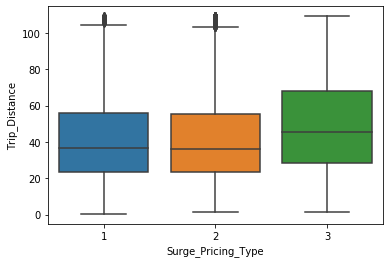

In [232]:
sns.boxplot(train.Surge_Pricing_Type, train.Trip_Distance)

In [241]:
# 41.06
#train[train['Surge_Pricing_Type'] == 1].Trip_Distance.mean()

# 41.26
#train[train['Surge_Pricing_Type'] == 2].Trip_Distance.mean()

# 49.476
train[train['Surge_Pricing_Type'] == 3].Trip_Distance.mean()

49.476233864207884

### Observation: We see that if Trip distance on an average is 49 then its most likely to be Surge Pricing 3

## Type of Cab

In [215]:
train.Type_of_Cab.unique()

array(['B', nan, 'C', 'E', 'D', 'A'], dtype=object)

In [217]:
train.Type_of_Cab.value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [218]:
train.Type_of_Cab.isnull().sum()

20210

In [226]:
pd.crosstab(index = train['Type_of_Cab'], columns = train['Surge_Pricing_Type'])

Surge_Pricing_Type      1      2      3
Type_of_Cab                            
A                   14916   2258   4395
B                    4918  23852   2366
C                    1037  17290   9795
D                    1065   2511  15415
E                    1073   2172   8389

### Observation - A lot of folks using type of Cab as A are having 1 Surge Pricing (more than 50% of total 1 surge)

### Is type of cab related to lifestyle index?

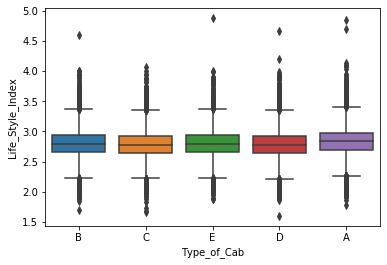

In [219]:
sns.boxplot(train.Type_of_Cab, train.Life_Style_Index)

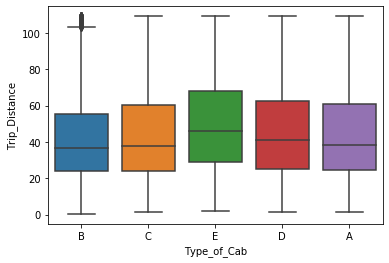

In [221]:
sns.boxplot(train.Type_of_Cab, train.Trip_Distance)

## Customer_Since_Months column

In [222]:
print(train.Customer_Since_Months.mean(), train.Customer_Since_Months.median(),  train.Customer_Since_Months.mode(), train.Customer_Since_Months.var)

6.016661099712109 6.0 0    10.0
dtype: float64 <bound method Series.var of 0          1.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
131657     1.0
131658     7.0
131659    10.0
131660     4.0
131661     7.0
Name: Customer_Since_Months, Length: 131662, dtype: float64>


In [223]:
train.Customer_Since_Months.value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

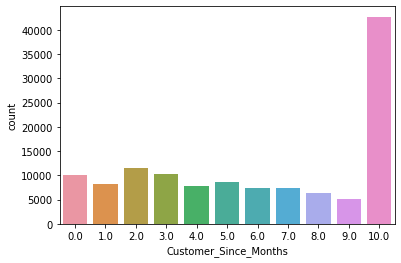

In [252]:
sns.countplot(train.Customer_Since_Months)

In [224]:
train.Customer_Since_Months.isnull().sum()

5920

In [260]:
pd.crosstab(index = train.Customer_Since_Months, columns = train.Surge_Pricing_Type, normalize = 'index')

Surge_Pricing_Type            1         2         3
Customer_Since_Months                              
0.0                    0.218802  0.444882  0.336316
1.0                    0.217307  0.438351  0.344341
2.0                    0.209534  0.442217  0.348249
3.0                    0.220558  0.433871  0.345570
4.0                    0.212659  0.437743  0.349599
5.0                    0.211318  0.427613  0.361069
6.0                    0.202034  0.426847  0.371119
7.0                    0.199541  0.424598  0.375861
8.0                    0.204014  0.438369  0.357617
9.0                    0.197785  0.424131  0.378084
10.0                   0.200914  0.423383  0.375703

### Observation -  The distribution is mostly even across different months 

# Column:
## Life_Style_Index column

In [244]:
print(train.Life_Style_Index.min(), train.Life_Style_Index.max())

1.59638 4.87511


In [247]:
print(train.Life_Style_Index.mean(), train.Life_Style_Index.median(), train.Life_Style_Index.mode())

2.802063999946174 2.79805 0    2.70697
1    2.77608
dtype: float64


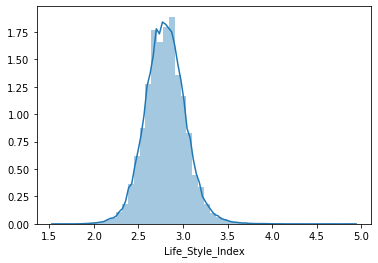

In [262]:
sns.distplot(train.Life_Style_Index)

In [246]:
train.Life_Style_Index.isnull().sum()

20193

In [272]:
# train.Life_Style_Bucket = [1 if train.Life_Style_Index < 2
#                            else 2 if train.Life_Style_Index < 2.6 
#                            else 3 if train.Life_Style_Index < 3.6
#                           else 4 if train.Life_Style_Index < 4.5
#                           else 5]

buckets = np.linspace(train.Life_Style_Index.min(), train.Life_Style_Index.max(), 6)
train['Bucket'] = pd.cut(train['Life_Style_Index'], buckets)

In [273]:
buckets

array([1.59638 , 2.252126, 2.907872, 3.563618, 4.219364, 4.87511 ])

In [274]:
train['Bucket'] = pd.cut(train['Life_Style_Index'], buckets)

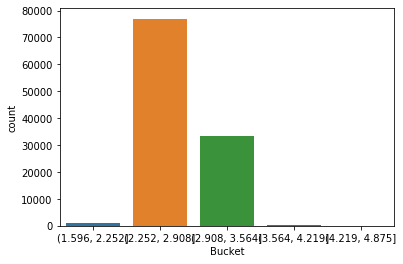

In [277]:
sns.countplot(train.Bucket)

In [280]:
pd.crosstab(index = train.Bucket, columns = train.Surge_Pricing_Type, normalize = 'index')

Surge_Pricing_Type         1         2         3
Bucket                                          
(1.596, 2.252]      0.152151  0.402938  0.444911
(2.252, 2.908]      0.182575  0.444257  0.373168
(2.908, 3.564]      0.263588  0.403199  0.333213
(3.564, 4.219]      0.256140  0.354386  0.389474
(4.219, 4.875]      0.166667  0.500000  0.333333

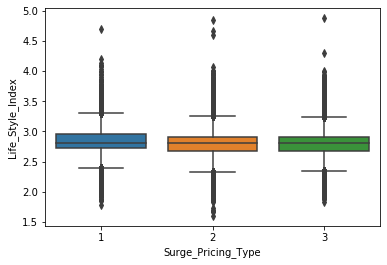

In [387]:
sns.boxplot(train.Surge_Pricing_Type, train.Life_Style_Index)

## Confidence_Life_Style_Index column

In [283]:
train.Confidence_Life_Style_Index.value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [285]:
train.Confidence_Life_Style_Index.isnull().sum()

20193

In [290]:
pd.crosstab(index = train.Confidence_Life_Style_Index, columns = train.Surge_Pricing_Type, normalize = 'index')

Surge_Pricing_Type                  1         2         3
Confidence_Life_Style_Index                              
A                            0.289356  0.482203  0.228441
B                            0.144245  0.383967  0.471788
C                            0.195930  0.435065  0.369005

In [289]:
pd.crosstab(index = train.Confidence_Life_Style_Index, columns = train.Bucket)

Bucket                       (1.596, 2.252]  (2.252, 2.908]  (2.908, 3.564]  \
Confidence_Life_Style_Index                                                   
A                                       299           27136            7681   
B                                       477           25750           13996   
C                                       177           24074           11587   

Bucket                       (3.564, 4.219]  (4.219, 4.875]  
Confidence_Life_Style_Index                                  
A                                        27               3  
B                                       131               1  
C                                       127               2

## Destination_Type

In [304]:
train.Destination_Type.unique()

array(['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M',
       'N'], dtype=object)

In [305]:
train.Destination_Type.value_counts()

A    77597
B    29555
C     7484
D     6588
E     2717
F     1950
G     1489
H     1260
I      813
J      695
K      680
L      643
N       98
M       93
Name: Destination_Type, dtype: int64

In [307]:
pd.crosstab(index = train.Destination_Type, columns = train.Surge_Pricing_Type, normalize = 'index')

Surge_Pricing_Type         1         2         3
Destination_Type                                
A                   0.177223  0.437040  0.385737
B                   0.286821  0.462900  0.250279
C                   0.237573  0.413282  0.349145
D                   0.130540  0.343048  0.526412
E                   0.301803  0.405226  0.292970
F                   0.134872  0.321026  0.544103
G                   0.355272  0.400940  0.243788
H                   0.141270  0.371429  0.487302
I                   0.121771  0.305043  0.573186
J                   0.162590  0.338129  0.499281
K                   0.241176  0.332353  0.426471
L                   0.203733  0.303266  0.493002
M                   0.204301  0.279570  0.516129
N                   0.316327  0.602041  0.081633

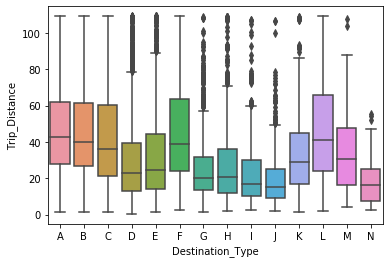

In [310]:
sns.boxplot(train.Destination_Type, train.Trip_Distance, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'])

## Customer_Rating

In [313]:
train.Customer_Rating.unique()

array([3.905  , 3.45   , 3.50125, ..., 0.00875, 4.995  , 0.61875])

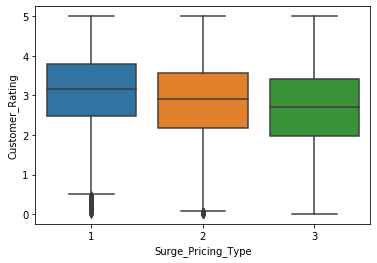

In [317]:
sns.boxplot(train.Surge_Pricing_Type, train.Customer_Rating)

### Mean variation for different customer ratings across Surge Pricing

In [322]:
# 3.11
#train[train['Surge_Pricing_Type'] == 1].Customer_Rating.mean()

# 2.85
#train[train['Surge_Pricing_Type'] == 2].Customer_Rating.mean()

# 2.69
train[train['Surge_Pricing_Type'] == 3].Customer_Rating.mean()

2.6894996332774523

### Observation - It is highly possible that as there is higher (3) surge, then customer ratings drop

## Cancellation_Last_1Month

In [325]:
train.Cancellation_Last_1Month.unique()

array([0, 2, 4, 1, 5, 3, 6, 7, 8], dtype=int64)

In [326]:
train.Cancellation_Last_1Month.value_counts()

0    68687
1    36834
2    16223
3     7142
4     1823
5      668
6      266
7       16
8        3
Name: Cancellation_Last_1Month, dtype: int64

In [328]:
pd.crosstab(index = train.Cancellation_Last_1Month, columns = train.Surge_Pricing_Type, normalize = 'index')

Surge_Pricing_Type               1         2         3
Cancellation_Last_1Month                              
0                         0.257298  0.457568  0.285134
1                         0.173047  0.419015  0.407938
2                         0.130617  0.389447  0.479936
3                         0.115934  0.357183  0.526883
4                         0.087767  0.347230  0.565003
5                         0.070359  0.368263  0.561377
6                         0.048872  0.394737  0.556391
7                         0.000000  0.750000  0.250000
8                         0.000000  0.000000  1.000000

In [ ]:
### Observation - with increasing cancellations in past 1 month, we expect more surge pricing happening

## Gender column

In [330]:
train.Gender.value_counts()

Male      93900
Female    37762
Name: Gender, dtype: int64

In [336]:
pd.crosstab(index = train.Gender, columns = train.Surge_Pricing_Type, normalize = 'index')

Surge_Pricing_Type         1         2         3
Gender                                          
Female              0.205445  0.434378  0.360177
Male                0.207199  0.429446  0.363355

### Observation - Gender column seems inconsequential. Can be removed

## Var1, Var2, Var3

In [338]:
print(train.Var1.min(), train.Var1.max(), train.Var1.mean(), train.Var1.median(), train.Var1.mode())

30.0 210.0 64.20269824515107 61.0 0    39.0
dtype: float64


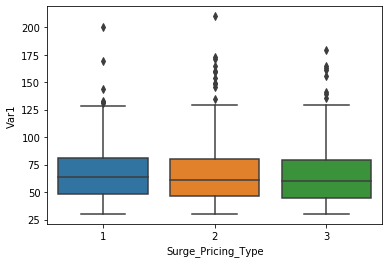

In [343]:
sns.boxplot(train.Surge_Pricing_Type, train.Var1)

In [346]:
print(train.Var2.min(), train.Var2.max(), train.Var2.mean(), train.Var2.median(), train.Var2.mode())

40 124 51.202799592896966 50.0 0    49
dtype: int64


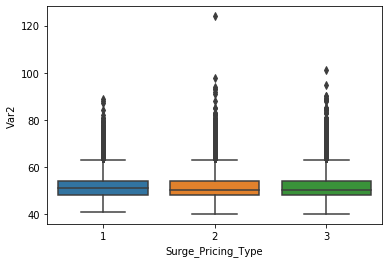

In [344]:
sns.boxplot(train.Surge_Pricing_Type, train.Var2)

In [347]:
print(train.Var3.min(), train.Var3.max(), train.Var3.mean(), train.Var3.median(), train.Var3.mode())

52 206 75.09901869939694 74.0 0    71
dtype: int64


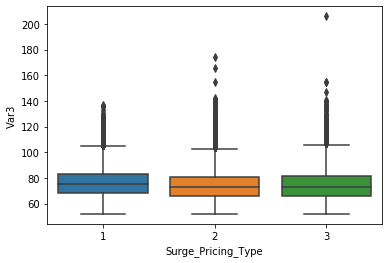

In [345]:
sns.boxplot(train.Surge_Pricing_Type, train.Var3)

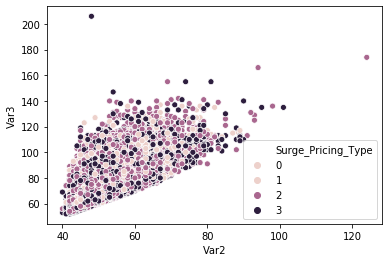

In [298]:
sns.scatterplot(train.Var2, train.Var3, hue = train.Surge_Pricing_Type)

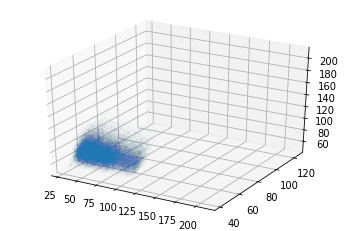

In [300]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(train.Var1, train.Var2, train.Var3, s = 0.5, alpha = 0.01)

plt.show()

In [301]:
#Libraries for interactive 3D visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [303]:
trace1 = go.Scatter3d(
    x = train.Trip_Distance, 
    y = train.Var2, 
    z = train.Var3,
mode = 'markers',
marker = dict(opacity = 0.001))

df = [trace1]

fig = go.Figure(data = df)
py.iplot(fig)

In [406]:
## Principal Component Analysis

var_data_train = train[['Var1', 'Var2', 'Var3']]

from sklearn.decomposition import PCA
pca_var = PCA(n_components = 2)

pca_var_data = pca_var.fit_transform(var_data_train)

In [407]:
pca_var_data

array([[-22.46220756, -18.33504598],
       [-26.49786316,   1.56276204],
       [ -0.33350129,   3.26826953],
       ...,
       [  0.11006193,  -1.0743894 ],
       [-17.57752666,   2.80788671],
       [ 36.468516  ,  14.97267802]])

In [411]:
pca_var_data = pd.DataFrame(pca_var_data)

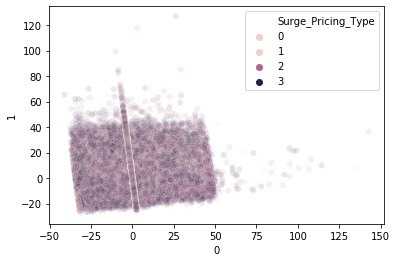

In [429]:
sns.scatterplot(pca_var_data.iloc[:, 0], pca_var_data.iloc[:, 1], alpha = 0.1)

In [405]:
np.cumsum(pca_var.explained_variance_ratio_)

array([0.58178616, 0.96801205, 1.        ])

## Cluster the data

In [384]:
from sklearn.cluster import KMeans

#train1 = train1.drop(['Gender'], axis =1)

km = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init =10, random_state = 2)

y_means = km.fit_predict(X)

In [367]:
y_means

array([0, 0, 2, ..., 2, 2, 0])

In [386]:
surge = pd.DataFrame(train1['Surge_Pricing_Type'])
y_mean = pd.DataFrame(y_means)

surge_check = surge.join(y_mean)
surge_check = surge_check.rename(columns = {"Surge_Pricing_Type" : "SPT", 0 : "y_mean"})
#surge_check.head()

pd.crosstab(index = surge_check.y_mean, columns = surge_check.SPT, normalize = 'index')

SPT            1         2         3
y_mean                              
0       0.200266  0.425585  0.374149
1       0.216282  0.439957  0.343761
2       0.206652  0.429227  0.364121

In [281]:
train.head()

Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
0  T0005689460           6.77           B                    1.0   
1  T0005689461          29.47           B                   10.0   
2  T0005689464          41.58         NaN                   10.0   
3  T0005689465          61.56           C                   10.0   
4  T0005689467          54.95           C                   10.0   

   Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
0           2.42769                           A                A   
1           2.78245                           B                A   
2               NaN                         NaN                E   
3               NaN                         NaN                A   
4           3.03453                           B                A   

   Customer_Rating  Cancellation_Last_1Month  Var1  Var2  Var3  Gender  \
0          3.90500                         0  40.0    46    60  Female   
1          3.45000                         0  38.0    56    78    Male   
2          3.50125                         2   NaN    56    77    Male   
3          3.45375                         0   NaN    52    74    Male   
4          3.40250                         4  51.0    49   102    Male   

   Surge_Pricing_Type          Bucket  
0                   2  (2.252, 2.908]  
1                   2  (2.252, 2.908]  
2                   2             NaN  
3                   3             NaN  
4                   2  (2.908, 3.564]

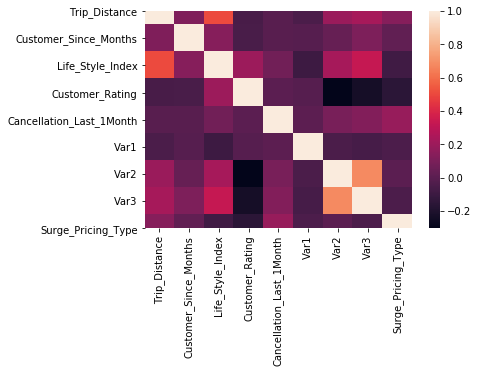

In [169]:
sns.heatmap(train.corr())

## Get all continuous variables for feature scaling

In [175]:
train_continuous_data = train[['Trip_Distance', 'Life_Style_Index', 'Customer_Rating', 'Var1', 'Var2', 'Var3']]
train_noncontinuous = train[['Type_of_Cab', 'Customer_Since_Months', 
                             'Confidence_Life_Style_Index', 'Destination_Type', 
                             'Cancellation_Last_1Month', 'Gender', 'Surge_Pricing_Type']]

In [174]:
log_data = np.log(train_continuous_data)

## Outlier treatment

In [195]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
   # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Trip_Distance':


Trip_Distance  Life_Style_Index  Customer_Rating      Var1      Var2  \
36           1.564441          0.904979         0.779325  4.394449  3.931826   
48           1.040277          0.887677         0.667829       NaN  3.850148   
114          1.456287               NaN         0.433404  4.521789  3.970292   
133          1.451614               NaN         0.759052       NaN  3.931826   
164          1.244155          0.956453         1.151363  3.713572  3.931826   
...               ...               ...              ...       ...       ...   
131431       1.564441          1.019569         1.230371       NaN  3.806662   
131475       1.690096          0.960036         1.370863  4.110874  3.871201   
131517       0.867100          0.978270         0.538684       NaN  4.025352   
131583       1.788421          0.929424         0.699378       NaN  3.912023   
131627       1.470176          1.033046         1.345798  4.330733  3.871201   

            Var3  
36      4.465908  
48      4.143135  
114     4.330733  
133     4.442651  
164     4.189655  
...          ...  
131431  4.025352  
131475  4.094345  
131517  4.418841  
131583  4.158883  
131627  4.189655  

[2075 rows x 6 columns]

Data points considered outliers for the feature 'Life_Style_Index':


Trip_Distance  Life_Style_Index  Customer_Rating      Var1      Var2  \
0            1.912501          0.886940         1.362258  3.688879  3.828641   
1            3.383373          1.023332         1.238374  3.637586  4.025352   
2            3.727619               NaN         1.253120       NaN  4.025352   
3            4.120012               NaN         1.239461       NaN  3.951244   
4            4.006424          1.110057         1.224510  3.931826  3.891820   
...               ...               ...              ...       ...       ...   
131657       2.461297          1.008793         1.189367  4.110874  3.850148   
131658       4.314952          1.033394        -0.809681       NaN  4.143135   
131659       3.693120          1.097161         1.204847       NaN  3.871201   
131660       3.847591          1.114302         1.424914  3.850148  3.988984   
131661       3.464485          1.077637         0.970305  4.624973  4.043051   

            Var3  
0       4.094345  
1       4.356709  
2       4.343805  
3       4.304065  
4       4.624973  
...          ...  
131657  4.330733  
131658  4.477337  
131659  4.317488  
131660  4.369448  
131661  4.442651  

[131662 rows x 6 columns]

Data points considered outliers for the feature 'Customer_Rating':


Trip_Distance  Life_Style_Index  Customer_Rating      Var1      Var2  \
119          3.412467          0.882597        -1.888821       NaN  3.871201   
160          4.085136          1.032195        -0.181822  4.043051  3.850148   
205          4.222298          1.111259        -0.040822       NaN  3.931826   
210          3.097837          0.837888        -5.991465  3.761200  3.871201   
280          3.768614          1.013207        -0.106750  3.583519  4.007333   
...               ...               ...              ...       ...       ...   
131576       3.239071          0.946901        -0.356675       NaN  3.871201   
131602       4.026958          0.992674        -0.071228       NaN  4.025352   
131603       3.579901          1.006336        -0.335473  3.688879  4.077537   
131628       2.685123          1.005257        -3.047026  3.433987  4.007333   
131658       4.314952          1.033394        -0.809681       NaN  4.143135   

            Var3  
119     4.442651  
160     4.418841  
205     4.369448  
210     4.143135  
280     4.430817  
...          ...  
131576  4.219508  
131602  4.304065  
131603  4.330733  
131628  4.382027  
131658  4.477337  

[4586 rows x 6 columns]

Data points considered outliers for the feature 'Var1':


Trip_Distance  Life_Style_Index  Customer_Rating      Var1      Var2  \
0            1.912501          0.886940         1.362258  3.688879  3.828641   
1            3.383373          1.023332         1.238374  3.637586  4.025352   
2            3.727619               NaN         1.253120       NaN  4.025352   
3            4.120012               NaN         1.239461       NaN  3.951244   
4            4.006424          1.110057         1.224510  3.931826  3.891820   
...               ...               ...              ...       ...       ...   
131657       2.461297          1.008793         1.189367  4.110874  3.850148   
131658       4.314952          1.033394        -0.809681       NaN  4.143135   
131659       3.693120          1.097161         1.204847       NaN  3.871201   
131660       3.847591          1.114302         1.424914  3.850148  3.988984   
131661       3.464485          1.077637         0.970305  4.624973  4.043051   

            Var3  
0       4.094345  
1       4.356709  
2       4.343805  
3       4.304065  
4       4.624973  
...          ...  
131657  4.330733  
131658  4.477337  
131659  4.317488  
131660  4.369448  
131661  4.442651  

[131662 rows x 6 columns]

Data points considered outliers for the feature 'Var2':


Trip_Distance  Life_Style_Index  Customer_Rating      Var1      Var2  \
67           3.615233               NaN         1.143426       NaN  4.276666   
75           4.531631          1.135648         1.284054  4.060443  4.219508   
215          2.942331          0.953822         0.871293  4.454347  4.330733   
233          3.033510          1.127792         0.964605       NaN  4.219508   
375          4.371724          1.033213         0.075803  4.634729  4.262680   
...               ...               ...              ...       ...       ...   
131498       4.346140          1.069884         0.785612       NaN  4.248495   
131529       2.913980          1.193862         1.112269       NaN  4.174387   
131630       3.789629          1.005426         0.242946       NaN  4.304065   
131632       4.420165          1.146481         0.072321  4.465908  4.276666   
131646       3.005683               NaN         0.237046  3.610918  4.234107   

            Var3  
67      4.499810  
75      4.615121  
215     4.595120  
233     4.727388  
375     4.700480  
...          ...  
131498  4.584967  
131529  4.510860  
131630  4.605170  
131632  4.574711  
131646  4.564348  

[2246 rows x 6 columns]

Data points considered outliers for the feature 'Var3':


Trip_Distance  Life_Style_Index  Customer_Rating      Var1      Var2  \
233          3.033510          1.127792         0.964605       NaN  4.219508   
607          4.455045          1.223172         1.003844       NaN  4.343805   
658          3.227241               NaN         0.034401  4.317488  4.234107   
736          4.598448          1.103391         0.700619  4.043051  4.219508   
828          3.723039          1.004507         1.010236       NaN  4.394449   
...               ...               ...              ...       ...       ...   
130728       3.856087          1.047396        -1.453503  4.465908  4.290459   
130927       4.290185          1.151366         1.131805  3.526361  4.174387   
130971       3.762827          0.976825         0.409623       NaN  4.143135   
131174       2.985177          0.994751         0.652976       NaN  4.356709   
131421       3.988799          1.042560         0.996026       NaN  4.110874   

            Var3  
233     4.727388  
607     4.890349  
658     4.727388  
736     4.770685  
828     4.727388  
...          ...  
130728  4.812184  
130927  4.820282  
130971  4.836282  
131174  4.727388  
131421  4.736198  

[948 rows x 6 columns]

In [178]:
train1 = log_data.join(train_noncontinuous)

In [179]:
train1.head()

Trip_Distance  Life_Style_Index  Customer_Rating      Var1      Var2  \
0       1.912501          0.886940         1.362258  3.688879  3.828641   
1       3.383373          1.023332         1.238374  3.637586  4.025352   
2       3.727619               NaN         1.253120       NaN  4.025352   
3       4.120012               NaN         1.239461       NaN  3.951244   
4       4.006424          1.110057         1.224510  3.931826  3.891820   

       Var3      Trip_ID Type_of_Cab  Customer_Since_Months  \
0  4.094345  T0005689460           B                    1.0   
1  4.356709  T0005689461           B                   10.0   
2  4.343805  T0005689464         NaN                   10.0   
3  4.304065  T0005689465           C                   10.0   
4  4.624973  T0005689467           C                   10.0   

  Confidence_Life_Style_Index Destination_Type  Cancellation_Last_1Month  \
0                           A                A                         0   
1                           B                A                         0   
2                         NaN                E                         2   
3                         NaN                A                         0   
4                           B                A                         4   

   Gender  Surge_Pricing_Type  
0  Female                   2  
1    Male                   2  
2    Male                   2  
3    Male                   3  
4    Male                   2

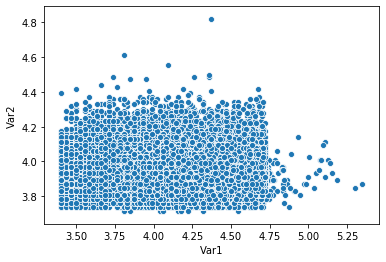

In [180]:
sns.scatterplot(train1.Var1, train1.Var2)

In [107]:
train.Destination_Type.unique()

array(['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M',
       'N'], dtype=object)

In [181]:
train1.isnull().any()

Trip_Distance                  False
Life_Style_Index                True
Customer_Rating                False
Var1                            True
Var2                           False
Var3                           False
Trip_ID                        False
Type_of_Cab                     True
Customer_Since_Months           True
Confidence_Life_Style_Index     True
Destination_Type               False
Cancellation_Last_1Month       False
Gender                         False
Surge_Pricing_Type             False
dtype: bool

In [196]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

## Fill missing values by Forward fill

In [349]:
train1 = train

In [725]:
#train1.Type_of_Cab.fillna(train1.Type_of_Cab.mode()[0], inplace = True)
train3.Customer_Since_Months.fillna(train3.Customer_Since_Months.mode()[0], inplace=True)
#train1.Life_Style_Index.fillna(train1.Life_Style_Index.mean(), inplace=True)
train3.Confidence_Life_Style_Index.fillna(train3.Confidence_Life_Style_Index.mode()[0], inplace = True)
#train1.Var1.fillna(train1.Var1.mean(), inplace = True)

In [726]:
train3.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Surge_Pricing_Type             False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index    False
Customer_Since_Months          False
dtype: bool

## Convert Strings to Float

In [358]:
Type_of_Cab = pd.get_dummies(train3.Type_of_Cab, prefix = "TypeCab")
Confidence_Life_Style_Index = pd.get_dummies(train3.Confidence_Life_Style_Index, prefix = 'Confidence')
Destination_Type = pd.get_dummies(train3.Destination_Type, prefix = 'Destination')
train1 = train1.join(Type_of_Cab)
train1 = train1.join(Confidence_Life_Style_Index)
train1 = train1.join(Destination_Type)


train1.Gender = train1.Gender.map({'Male':1, 'Female':0})



#train.Type_of_Cab

In [1028]:
train4.columns

Index(['Trip_Distance', 'Destination_Type', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type', 'Type_of_Cab', 'Life_Style_Bucket',
       'Confidence_Life_Style_Index', 'Customer_Since_Months', 'Var1'],
      dtype='object')

In [1029]:
X = train4[['Trip_Distance', 'Destination_Type', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3', 'Gender',
            'Type_of_Cab', 'Life_Style_Bucket', 'Confidence_Life_Style_Index', 'Customer_Since_Months']]

y = train4['Surge_Pricing_Type']

In [188]:
y.unique()

array([2, 3, 1], dtype=int64)

In [743]:
X

Trip_Distance Destination_Type  Customer_Rating  \
0                6.77                1          3.90500   
1               29.47                1          3.45000   
4               54.95                1          3.40250   
6               29.72                2          2.97500   
7               18.44                1          3.58250   
...               ...              ...              ...   
131535          74.16                1          2.42875   
131584          60.82                1          2.54250   
131594          45.89                1          3.26500   
131600          61.30                1          4.35125   
131609          23.37                1          3.39750   

        Cancellation_Last_1Month  Var2  Var3  Gender Type_of_Cab  \
0                              0    46    60       1           2   
1                              0    56    78       0           2   
4                              4    49   102       0           3   
6                              1    50    75       0           5   
7                              0    46    63       0           2   
...                          ...   ...   ...     ...         ...   
131535                         2    50    75       0           2   
131584                         2    51    84       0           5   
131594                         3    60    80       0           2   
131600                         0    45    65       0           2   
131609                         1    46    61       0           1   

        Life_Style_Bucket  Customer_Since_Months  
0                     3.0                    1.0  
1                     4.0                   10.0  
4                     5.0                   10.0  
6                     4.0                   10.0  
7                     4.0                    2.0  
...                   ...                    ...  
131535                5.0                    3.0  
131584                5.0                    2.0  
131594                4.0                    2.0  
131600                5.0                    9.0  
131609                4.0                    1.0  

[131662 rows x 10 columns]

In [390]:
X = X.drop(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type'], axis = 1)

KeyError: "['Type_of_Cab' 'Confidence_Life_Style_Index' 'Destination_Type'] not found in axis"

## Model building

In [729]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [1030]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 1315)

In [1031]:
rf_clf = RandomForestClassifier(n_estimators = 1000, max_features = "auto", criterion = 'entropy', class_weight = 'balanced')

In [193]:
X.head()

Trip_Distance  Customer_Since_Months  Life_Style_Index  Customer_Rating  \
0       1.912501                    1.0          0.886940         1.362258   
1       3.383373                   10.0          1.023332         1.238374   
2       3.727619                   10.0          1.027102         1.253120   
3       4.120012                   10.0          1.027102         1.239461   
4       4.006424                   10.0          1.110057         1.224510   

   Cancellation_Last_1Month      Var1      Var2      Var3  Gender  TypeCab_A  \
0                         0  3.688879  3.828641  4.094345       0          0   
1                         0  3.637586  4.025352  4.356709       1          0   
2                         2  4.103734  4.025352  4.343805       1          0   
3                         0  4.103734  3.951244  4.304065       1          0   
4                         4  3.931826  3.891820  4.624973       1          0   

   TypeCab_B  TypeCab_C  TypeCab_D  TypeCab_E  Confidence_A  Confidence_B  \
0          1          0          0          0             1             0   
1          1          0          0          0             0             1   
2          1          0          0          0             0             1   
3          0          1          0          0             0             1   
4          0          1          0          0             0             1   

   Destination_A  Destination_B  
0              1              0  
1              1              0  
2              0              0  
3              1              0  
4              1              0

In [1032]:
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_val)
accuracy = rf_clf.score(X_val, y_val)
accuracy

0.7087434682221412

In [90]:
y_pred

array([1, 2, 3, ..., 3, 1, 2], dtype=int64)

In [93]:
y_val

66559     1
73388     2
91631     3
35028     2
14942     3
         ..
129198    1
117233    1
15872     3
67684     1
17556     2
Name: Surge_Pricing_Type, Length: 26333, dtype: int64

In [1016]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.7020901689148135

([<matplotlib.axis.XTick at 0x13152a43048>,
 <a list of 11 Text xticklabel objects>)

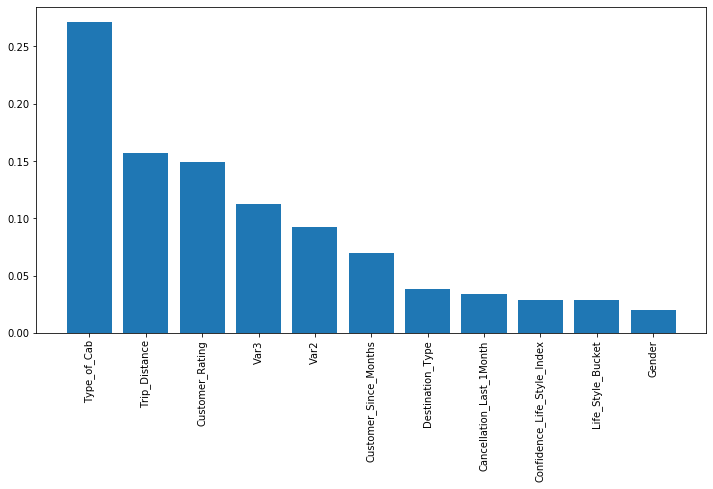

In [818]:
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 12), importances[indices], align="center")

plt.xticks(range(1, 12), X_train.columns[indices], rotation=90)

In [1034]:
test = pd.read_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV Mobile Analytics/test.csv")

In [954]:
test.isnull().sum()*100/test.shape[0]

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.055781
Customer_Since_Months           4.538017
Life_Style_Index               15.249156
Confidence_Life_Style_Index    15.249156
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.537388
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
dtype: float64

In [955]:
test.Destination_Type = np.where(test.Destination_Type == 'A', 1, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'B', 2, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'C', 3, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'D', 4, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'E', 5, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'F', 6, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'G', 7, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'H', 8, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'I', 9, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'J', 10, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'K', 11, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'L', 12, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'M', 13, test.Destination_Type)
test.Destination_Type = np.where(test.Destination_Type == 'N', 14, test.Destination_Type)

In [956]:
test.Gender = np.where(test.Gender == 'Male', 0, 1)

In [957]:
test = test.drop(['Var1'], axis = 1)

In [958]:
test_cab_filled = test[test['Type_of_Cab'].isnull() == False]
test_cab_null = test[test['Type_of_Cab'].isnull() == True]

removed_columns = test[['Life_Style_Index', 'Confidence_Life_Style_Index', 'Customer_Since_Months']]

X_cab_fill = test_cab_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender']]

y_cab_fill = test_cab_filled['Type_of_Cab']


X_cab_null = test_cab_null[['Trip_Distance', 'Destination_Type','Customer_Rating', 
                             'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender']]

y_cab_null = test_cab_null['Type_of_Cab']


neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_cab_fill, y_cab_fill)

y_predict_cab = neigh.predict(X_cab_null)

neigh.score(X_cab_fill, y_cab_fill)


test_cab_fill = X_cab_fill.join(y_cab_fill)
test_cab_null = X_cab_null
test_cab_null['Type_of_Cab'] =  y_predict_cab

test1 = pd.concat([test_cab_fill, test_cab_null])
test1 = test1.join(removed_columns)

In [959]:
test1.Type_of_Cab = np.where(test1.Type_of_Cab == 'A', 1, test1.Type_of_Cab)
test1.Type_of_Cab = np.where(test1.Type_of_Cab == 'B', 2, test1.Type_of_Cab)
test1.Type_of_Cab = np.where(test1.Type_of_Cab == 'C', 3, test1.Type_of_Cab)
test1.Type_of_Cab = np.where(test1.Type_of_Cab == 'D', 4, test1.Type_of_Cab)
test1.Type_of_Cab = np.where(test1.Type_of_Cab == 'E', 5, test1.Type_of_Cab)

In [829]:
buckets

array([1.31785 , 1.673257, 2.028664, 2.384071, 2.739478, 3.094885,
       3.450292, 3.805699, 4.161106, 4.516513, 4.87192 ])

In [960]:
buckets = np.linspace(test1.Life_Style_Index.min(), test1.Life_Style_Index.max(), 11)
test1['Life_Style_Bucket'] = pd.cut(test1['Life_Style_Index'], buckets)


test1.Life_Style_Bucket = np.where(test1.Life_Style_Index <= 1.924253 , 1, 
         np.where(test1.Life_Style_Index <= 2.252126 , 2, 
                  np.where(test1.Life_Style_Index <= 2.579999 , 3, 
                           np.where(test1.Life_Style_Index <= 2.907872 , 4, 
                                    np.where(test1.Life_Style_Index <= 3.235745 , 5, 
                                             np.where(test1.Life_Style_Index <= 3.563618 , 6, 
                                                      np.where(test1.Life_Style_Index <= 3.891491 , 7, 
                                                               np.where(test1.Life_Style_Index <= 4.219364 , 8, 
                                                                        np.where(test1.Life_Style_Index <= 4.547237 , 9, np.where(test1.Life_Style_Index <= 4.87511 , 10, test1.Life_Style_Index))))))))))

In [1035]:
test_var1 = test['Var1']

In [831]:
test1

Trip_Distance Destination_Type  Customer_Rating  \
0               9.44                2          3.68000   
1              32.15                1          1.59375   
2              10.38                4          4.50500   
4              32.03               11          4.60125   
5              18.26                1          3.58250   
...              ...              ...              ...   
87369          16.62                7          1.25875   
87375          17.07                2          3.55750   
87379          20.50                2          3.41500   
87381          20.45                1          2.76125   
87383          45.50                1          1.81375   

       Cancellation_Last_1Month  Var2  Var3  Gender Type_of_Cab  \
0                             2    46    63       0           1   
1                             0    49    80       1           2   
2                             0    47    74       0           3   
4                             3    44    56       0           2   
5                             2    56    78       1           5   
...                         ...   ...   ...     ...         ...   
87369                         2    66    93       0           2   
87375                         0    47    65       0           3   
87379                         0    43    57       1           2   
87381                         2    47    65       1           3   
87383                         1    44    79       1           4   

       Life_Style_Index Confidence_Life_Style_Index  Customer_Since_Months  \
0               2.57438                           A                   10.0   
1               2.85143                           A                   10.0   
2               2.70530                           A                    4.0   
4               2.81598                           A                    7.0   
5                   NaN                         NaN                    2.0   
...                 ...                         ...                    ...   
87369               NaN                         NaN                    0.0   
87375           2.70295                           A                    4.0   
87379           2.18845                           A                    0.0   
87381           2.61062                           C                    5.0   
87383           2.64424                           C                    5.0   

       Life_Style_Bucket  
0                    3.0  
1                    4.0  
2                    4.0  
4                    4.0  
5                    NaN  
...                  ...  
87369                NaN  
87375                4.0  
87379                2.0  
87381                4.0  
87383                4.0  

[87395 rows x 12 columns]

In [961]:
test1.drop(['Life_Style_Index'], axis = 1)

Trip_Distance Destination_Type  Customer_Rating  \
0               9.44                2          3.68000   
1              32.15                1          1.59375   
2              10.38                4          4.50500   
4              32.03               11          4.60125   
5              18.26                1          3.58250   
...              ...              ...              ...   
87369          16.62                7          1.25875   
87375          17.07                2          3.55750   
87379          20.50                2          3.41500   
87381          20.45                1          2.76125   
87383          45.50                1          1.81375   

       Cancellation_Last_1Month  Var2  Var3  Gender Type_of_Cab  \
0                             2    46    63       0           1   
1                             0    49    80       1           2   
2                             0    47    74       0           3   
4                             3    44    56       0           2   
5                             2    56    78       1           5   
...                         ...   ...   ...     ...         ...   
87369                         2    66    93       0           2   
87375                         0    47    65       0           3   
87379                         0    43    57       1           2   
87381                         2    47    65       1           3   
87383                         1    44    79       1           4   

      Confidence_Life_Style_Index  Customer_Since_Months  Life_Style_Bucket  
0                               A                   10.0                3.0  
1                               A                   10.0                4.0  
2                               A                    4.0                4.0  
4                               A                    7.0                4.0  
5                             NaN                    2.0                NaN  
...                           ...                    ...                ...  
87369                         NaN                    0.0                NaN  
87375                           A                    4.0                4.0  
87379                           A                    0.0                2.0  
87381                           C                    5.0                4.0  
87383                           C                    5.0                4.0  

[87395 rows x 11 columns]

In [962]:
test1_lsi_filled = test1[test1['Life_Style_Bucket'].isnull() == False]
test1_lsi_null = test1[test1['Life_Style_Bucket'].isnull() == True]



removed_columns2 = test1[['Confidence_Life_Style_Index', 'Customer_Since_Months']]

X_lsi_fill = test1_lsi_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Type_of_Cab']]

y_lsi_fill = test1_lsi_filled['Life_Style_Bucket']


X_lsi_null = test1_lsi_null[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                              'Type_of_Cab']]

y_lsi_null = test1_lsi_null['Life_Style_Bucket']




neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_lsi_fill, y_lsi_fill)

y_predict_lsi = neigh.predict(X_lsi_null)

neigh.score(X_lsi_fill, y_lsi_fill)





test_lsi_fill = X_lsi_fill.join(y_lsi_fill)
test_lsi_null = X_lsi_null
test_lsi_null['Life_Style_Bucket'] =  y_predict_lsi

test2 = pd.concat([test_lsi_fill, test_lsi_null])
test2 = test2.join(removed_columns2)

In [963]:
test2.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index     True
Customer_Since_Months           True
dtype: bool

In [964]:
test2.Confidence_Life_Style_Index = np.where(test2.Confidence_Life_Style_Index == 'A', 1, test2.Confidence_Life_Style_Index)
test2.Confidence_Life_Style_Index = np.where(test2.Confidence_Life_Style_Index == 'B', 2, test2.Confidence_Life_Style_Index)
test2.Confidence_Life_Style_Index = np.where(test2.Confidence_Life_Style_Index == 'C', 3, test2.Confidence_Life_Style_Index)

In [965]:
test2_clsi_filled = test2[test2['Confidence_Life_Style_Index'].isnull() == False]
test2_clsi_null = test2[test2['Confidence_Life_Style_Index'].isnull() == True]


removed_columns2 = test2[['Customer_Since_Months']]

X_clsi_fill = test2_clsi_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                                 'Type_of_Cab', 'Life_Style_Bucket']]

y_clsi_fill = test2_clsi_filled['Confidence_Life_Style_Index']


X_clsi_null = test2_clsi_null[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                                'Type_of_Cab', 'Life_Style_Bucket']]

y_clsi_null = test2_clsi_null['Confidence_Life_Style_Index']



y_clsi_fill=y_clsi_fill.astype('int')



neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_clsi_fill, y_clsi_fill)

y_predict_clsi = neigh.predict(X_clsi_null)

neigh.score(X_clsi_fill, y_clsi_fill)



test_clsi_fill = X_clsi_fill.join(y_clsi_fill)
test_clsi_null = X_clsi_null
test_clsi_null['Confidence_Life_Style_Index'] =  y_predict_clsi

test3 = pd.concat([test_clsi_fill, test_clsi_null])
test3 = test3.join(removed_columns2)

In [966]:
test3.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index    False
Customer_Since_Months           True
dtype: bool

In [967]:
test3_csm_filled = test3[test3['Customer_Since_Months'].isnull() == False]
test3_csm_null = test3[test3['Customer_Since_Months'].isnull() == True]


X_csm_fill = test3_csm_filled[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                               'Type_of_Cab', 'Life_Style_Bucket', 
                                'Confidence_Life_Style_Index']]

y_csm_fill = test3_csm_filled['Customer_Since_Months']


X_csm_null = test3_csm_null[['Trip_Distance','Destination_Type','Customer_Rating', 
                               'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
                              'Type_of_Cab', 'Life_Style_Bucket', 
                                'Confidence_Life_Style_Index']]

y_csm_null = test3_csm_null['Customer_Since_Months']





neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_csm_fill, y_csm_fill)

y_predict_csm = neigh.predict(X_csm_null)

neigh.score(X_csm_fill, y_csm_fill)









test_csm_fill = X_csm_fill.join(y_csm_fill)
test_csm_null = X_csm_null
test_csm_null['Customer_Since_Months'] =  y_predict_csm

test4 = pd.concat([test_csm_fill, test_csm_null])

In [968]:
test4.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index    False
Customer_Since_Months          False
dtype: bool

In [72]:
test.Type_of_Cab.fillna(test.Type_of_Cab.mode()[0], inplace = True)
test.Customer_Since_Months.fillna(test.Customer_Since_Months.mode()[0], inplace=True)
test.Life_Style_Index.fillna(test.Life_Style_Index.mean(), inplace=True)
test.Confidence_Life_Style_Index.fillna(test.Confidence_Life_Style_Index.mode()[0], inplace = True)
test.Var1.fillna(test.Var1.mean(), inplace = True)

In [73]:
test.isnull().any()

Trip_ID                        False
Trip_Distance                  False
Type_of_Cab                    False
Customer_Since_Months          False
Life_Style_Index               False
Confidence_Life_Style_Index    False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var1                           False
Var2                           False
Var3                           False
Gender                         False
dtype: bool

In [844]:
test4.shape

(87395, 11)

In [74]:
Type_of_Cab = pd.get_dummies(test.Type_of_Cab, prefix = "TypeCab")
Confidence_Life_Style_Index = pd.get_dummies(test.Confidence_Life_Style_Index, prefix = 'Confidence')
Destination_Type = pd.get_dummies(test.Destination_Type, prefix = 'Destination')
test = test.join(Type_of_Cab)
test = test.join(Confidence_Life_Style_Index)
test = test.join(Destination_Type)


test.Gender = test.Gender.map({'Male':1, 'Female':0})

In [1038]:
X_test = test4

In [1040]:
test_var1.fillna(test_var1.mean(), inplace = True)

In [1041]:
test_var1

0         63.93661
1         65.00000
2         63.93661
3         63.00000
4         96.00000
           ...    
87390     74.00000
87391    109.00000
87392     63.93661
87393    107.00000
87394     63.93661
Name: Var1, Length: 87395, dtype: float64

In [1042]:
X_test = X_test.join(test_var1)

In [1047]:
X_test.isnull().any()

Trip_Distance                  False
Destination_Type               False
Customer_Rating                False
Cancellation_Last_1Month       False
Var2                           False
Var3                           False
Gender                         False
Type_of_Cab                    False
Life_Style_Bucket              False
Confidence_Life_Style_Index    False
Customer_Since_Months          False
Var1                           False
dtype: bool

In [970]:
test5 = test4.join(test['Trip_ID'])

In [971]:
test5

Trip_Distance Destination_Type  Customer_Rating  \
0               9.44                2          3.68000   
1              32.15                1          1.59375   
2              10.38                4          4.50500   
4              32.03               11          4.60125   
6              47.34                2          0.84125   
...              ...              ...              ...   
85518          65.35                2          2.88875   
85613          23.30                1          2.50875   
86181          37.41                2          3.43750   
86976           7.23                4          2.02875   
87164          14.68                1          1.12875   

       Cancellation_Last_1Month  Var2  Var3  Gender Type_of_Cab  \
0                             2    46    63       0           1   
1                             0    49    80       1           2   
2                             0    47    74       0           3   
4                             3    44    56       0           2   
6                             0    60    73       1           5   
...                         ...   ...   ...     ...         ...   
85518                         2    65   111       1           2   
85613                         0    44    58       0           3   
86181                         1    50    64       1           1   
86976                         4    47    59       1           1   
87164                         0    45    55       0           3   

       Life_Style_Bucket  Confidence_Life_Style_Index  Customer_Since_Months  \
0                    3.0                            1                   10.0   
1                    4.0                            1                   10.0   
2                    4.0                            1                    4.0   
4                    4.0                            1                    7.0   
6                    4.0                            3                    0.0   
...                  ...                          ...                    ...   
85518                5.0                            3                   10.0   
85613                3.0                            2                    4.0   
86181                4.0                            1                    8.0   
86976                4.0                            2                    2.0   
87164                3.0                            1                    2.0   

           Trip_ID  
0      T0005689459  
1      T0005689462  
2      T0005689463  
4      T0005689468  
6      T0005689476  
...            ...  
85518  T0005903866  
85613  T0005904134  
86181  T0005905580  
86976  T0005907498  
87164  T0005907976  

[87395 rows x 12 columns]

In [972]:
test6 = test5['Trip_ID']

In [973]:
test6

0        T0005689459
1        T0005689462
2        T0005689463
4        T0005689468
6        T0005689476
            ...     
85518    T0005903866
85613    T0005904134
86181    T0005905580
86976    T0005907498
87164    T0005907976
Name: Trip_ID, Length: 87395, dtype: object

In [1048]:
y_test_pred = rf_clf.predict(X_test)

In [1050]:
y_test_pred = pd.DataFrame(y_test_pred)

In [1051]:
test6.to_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV Mobile Analytics/Index8.csv")
y_test_pred.to_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/AV Mobile Analytics/pred8.csv")